In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from subprocess import call
import matplotlib.pyplot as plt

**Decision Tree using Information Gain**

In [ ]:
#Prepare Dataset

#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny',
'Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
#Label Encoding
le=preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded=le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
# Step 4: Merge different features to prepare dataset
features_dataset=tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print(features_dataset)

((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


In [ ]:
#Create train test split
x_train,x_test,y_train,y_test=train_test_split(features_dataset,Play_encoded,test_size=0.2,random_state=100)

In [ ]:
# Step 5: Train ’Create and Train DecisionTreeClassifier’

#Create a Decision Tree Classifier (using Entropy)
data_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100)
#training
data_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
# Step 6: Predict Output for new data
y_pred=data_entropy.predict(x_test)
print("Predicted Y: ",y_pred)
new_pred=data_entropy.predict([(1,2,1,0)])
print("Predicted New: ",new_pred)


Predicted Y:  [1 1 1]
Predicted New:  [1]


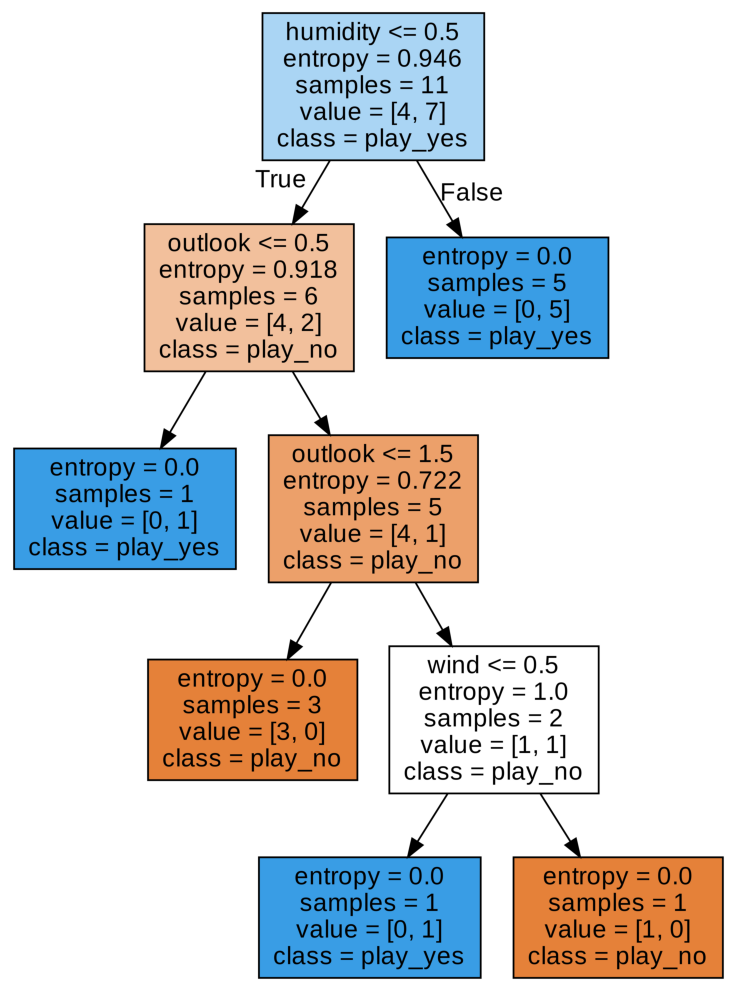

In [ ]:
#Convert into tree
export_graphviz(data_entropy,out_file='tree_entropy.dot',feature_names=['outlook','temperature','humidity','wind'],
                class_names=['play_no','play_yes'],filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

**On Iris Dataset using GINI INDEX**

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import  confusion_matrix
from sklearn import tree

#Load dataset
iris_data = datasets.load_iris()
iris=pd.DataFrame(iris_data.data)

In [ ]:
# print the names of the 4 features
iris_features=iris_data.feature_names
# print(iris_features)
# print the label type of iris(class_0, class_1, class_2)
iris_classlabel=iris_data.target
print(iris_classlabel)

X = iris.values[:, 0:4]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
#split data set into train and test sets
x_train,x_test,y_train,y_test=train_test_split(X,iris_classlabel,test_size=0.2,random_state=100)

In [ ]:
#Create a Decision Tree Classifier (using Gini)
clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100)

#Train the model using the training sets
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:
# Predict the classes of test data
y_pred_gini=clf_gini.predict(x_test)
print("Predicted Y:",y_pred_gini)


Predicted Y: [2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2]


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred_gini))
print("Confusion Matrix:\n ",confusion_matrix(y_test,y_pred_gini))

Accuracy:  0.9666666666666667
Confusion Matrix:
  [[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


In [ ]:
export_graphviz(clf_gini,out_file='iris_tree.dot',feature_names=list(iris_data.feature_names),class_names=list(iris_data.target_names), filled=True)
# Convert to png
#from subprocess import call
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

0

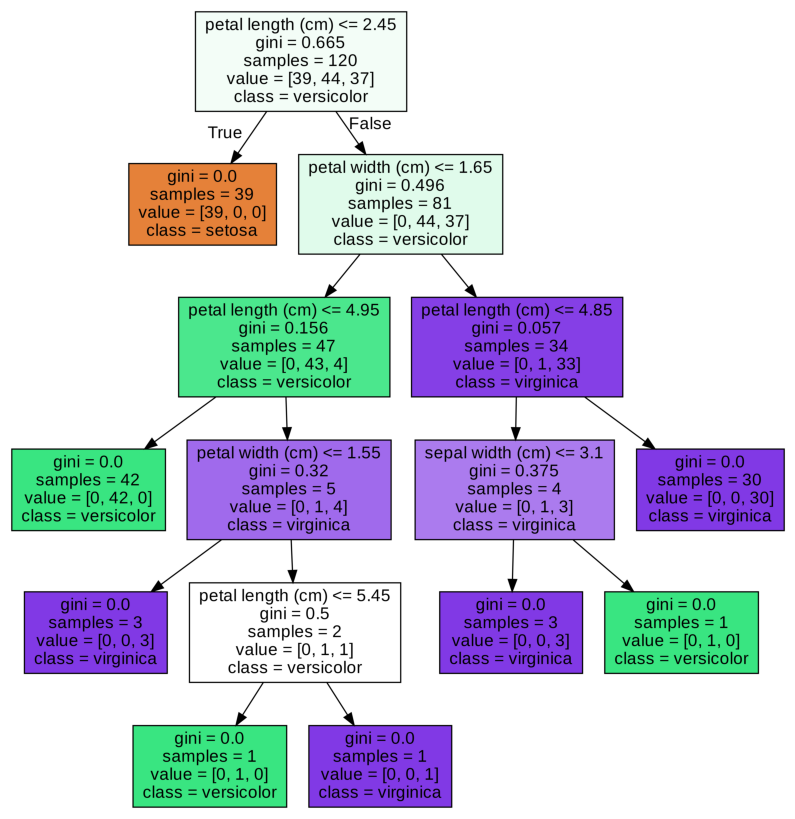

In [ ]:
# Display in python
# import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('iris_tree.png'))
plt.axis('off')
plt.show()

**#TASK 1**

In [ ]:
#Task 1: Try the algo on Same Weather dataset - OneHotEncoding of features: and Train test Division 70%-30%

#Combinig weather and temp into single listof tuples
wether_features=tuple(zip(Outlook,Temperature,Humidity,Wind))
oneHotEncode=preprocessing.OneHotEncoder()
encoded_weather_feature=oneHotEncode.fit_transform(wether_features).toarray()
print(wether_features)

print(encoded_weather_feature)

(('Rainy', 'Hot', 'High', 'False'), ('Rainy', 'Hot', 'High', 'True'), ('Overcast', 'Hot', 'High', 'False'), ('Sunny', 'Mild', 'High', 'False'), ('Sunny', 'Cool', 'Normal', 'False'), ('Sunny', 'Cool', 'Normal', 'True'), ('Overcast', 'Cool', 'Normal', 'True'), ('Rainy', 'Mild', 'High', 'False'), ('Rainy', 'Cool', 'Normal', 'False'), ('Sunny', 'Mild', 'Normal', 'False'), ('Rainy', 'Mild', 'Normal', 'True'), ('Overcast', 'Mild', 'High', 'True'), ('Overcast', 'Hot', 'Normal', 'False'), ('Sunny', 'Mild', 'High', 'True'))
[[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]]


In [ ]:
#Train test split 70-30%
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(encoded_weather_feature,Play_encoded, test_size = 0.30, random_state = 100)

#Train Model
clf_gini_weather=DecisionTreeClassifier(criterion="gini",random_state=100)
clf_gini_weather.fit(x_train_w,y_train_w)


DecisionTreeClassifier(random_state=100)

In [ ]:
# Predict usign model
y_pred_w=clf_gini_weather.predict(x_test_w)
print("Y Actual:    ",y_test_w)
print("Y Predicted: ",y_pred_w)

Y Actual:     [1 1 0 0 1]
Y Predicted:  [0 1 1 0 1]


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ",metrics.accuracy_score(y_test_w,y_pred_w))
print("Confusion Matrix:\n ",confusion_matrix(y_test_w,y_pred_w))

Accuracy:  0.6
Confusion Matrix:
  [[1 1]
 [1 2]]


[Text(0.6666666666666666, 0.875, 'X[7] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.5, 0.625, 'X[1] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.375, 'X[8] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

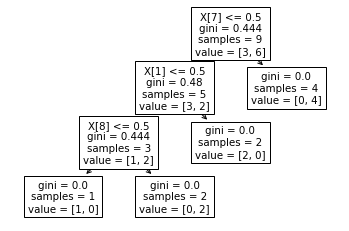

In [ ]:
#Create Tree
tree.plot_tree(clf_gini_weather)